In [ ]:
%pylab inline 
import pandas as pd
from scipy import linalg
from sklearn import tree
from itertools import combinations
import scipy
import scipy.io as io
from scipy.io import mmread
import scipy.sparse as sparse

Populating the interactive namespace from numpy and matplotlib


$\def\m#1{\mathbf{#1}}$
$\def\mm#1{\boldsymbol{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
$\def\mr#1{\mathrm{#1}}$
$\newenvironment{rmat}{\left[\begin{array}{rrrrrrrrrrrrr}}{\end{array}\right]}$
$\newcommand\brm{\begin{rmat}}$
$\newcommand\erm{\end{rmat}}$
$\newenvironment{cmat}{\left[\begin{array}{ccccccccc}}{\end{array}\right]}$
$\newcommand\bcm{\begin{cmat}}$
$\newcommand\ecm{\end{cmat}}$
# Homework 5
## Homework guideline
- The deadline is Dec 7th 10:30am. Submission after the deadline will not be graded. 


- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point. 

- Please justify all short answers with a brief explanation. 



- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources. But you
must understand, write, and hand in your own answers. In addition, you must write and submit
your own code in the programming part of the assignment (we may run your code).
If you copy someone else homework solution, both of you may receive ZERO point. 


- Colab is preferred. However, if you use Anaconda, please download the .mat file locally and save it to the same folder as this homework file. 



**Collaboration:** List the names of all people you collaborated with and for which question(s). This is important!



---



---
# Q1: SPECTF Heart Data (30pt)
In this programming exercise, we will get started with using scikit-learn and python by using an existing
decision tree implementation provided with scikit-learn.

### Data Set Description
We will be applying decision tree learning to the evaluation of cardiac Single Proton Emission Computed
Tomography (SPECT) images. We will work with a database of 267 SPECT image sets, each of which corresponds to a patient. Each patient’s scan was classified as either “normal(0)” or “abnormal(1)” by a physician; your job is to train a **classifier** to automatically evaluate SPECT image sets based on this training data. Instead
of working with raw image sets, each SPECT image set was processed to extract 44 continuous features
that summarize the original SPECT images. Each feature is a number between 0 and 100 corresponding
to a “region of interest” in the image during stress or at-rest tests. 

The data is given in `SPECTF.dat`: the
first column represents the class label and the remaining columns represent the features. The SPECTF data
originally came from http://archive.ics.uci.edu/ml/datasets/SPECTF+Heart.


In [ ]:
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW4/SPECTF.dat?raw=true -O SPECTF.dat

--2022-12-07 14:15:59--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW4/SPECTF.dat?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35764 (35K) [text/plain]
Saving to: ‘SPECTF.dat’

SPECTF.dat          100%[===================>]  34.93K  --.-KB/s    in 0s      

2022-12-07 14:16:00 (104 MB/s) - ‘SPECTF.dat’ saved [35764/35764]



In [ ]:
data = np.loadtxt('SPECTF.dat', delimiter=',')
X = data[:, 1:]
y = np.array([data[:, 0]]).T
n,d = X.shape

In [ ]:
print(X.shape)
print(y.shape)

(267, 44)
(267, 1)




---


### Q1.1 Cross-validation (30pt)
In this problem, we will 9-fold validate to determine the hyperparameter: the  maximum layer of the decision tree. 
1. Randomize the order of the instances in the data set, and split the data into training, validation and testing sets with 80%, 10% and 10%. 

2. Perform 9-fold cross validation over the training and validation datasets, and record **the training error and validation error** for the decision tree with maximum layer from 1 to 10. 

3. Since the contruction of decision tree in sklearn is random, please repeat the process of step 1 and 2 **100 trials**, and report **the mean and standard deviation** of the training error and validation error over all 100 trials of  9-fold validation. Be certain to shuffle the data at the start of each trial, but never within a trial.

4. Plot mean of both errors in the same figure vs the maximum layer and report the optimal maximum layer. 

5. Combine the training and validation dataset, build the decision tree classifier with the optimal maximum layer and report the testing error on predicting the testing dataset.  

Note although scikit-learn provides libraries that implement 9-fold validation, you may not use them
for this assignment – you must implement 9-fold validation yourself.

To display the standard deviations on the plot, see errorbar (http://matplotlib.org/examples/statistics/errorbar_demo_features.html) functions in matplotlib.

In [ ]:
# Q1.1  your code starts here
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# set aside 10% of train and test data for evaluation
train, test = train_test_split(data,test_size=0.1, random_state=9)

# Use the same function above for the validation set
train, val= train_test_split(train,test_size=0.1, random_state= 9) # 0.1 x 0.8 = 0.8




# Your Solution:

Accuracy: 0.6666666666666666


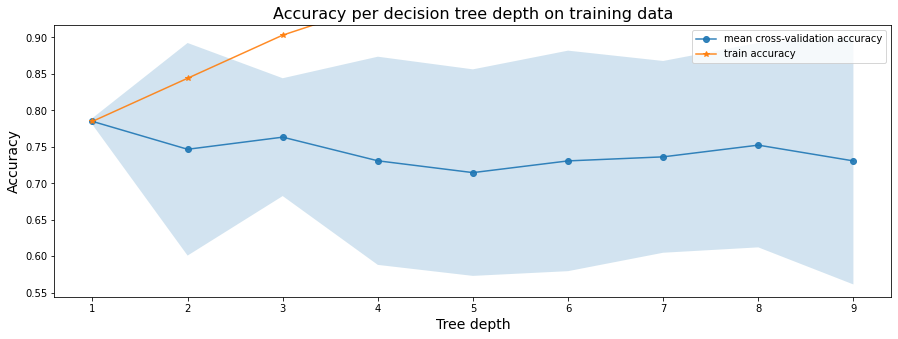

In [ ]:
# SECTION-6  MTL MODEL IMAGE VIEW
# Importing libraries for visualizing the Model's structure
from keras.utils import plot_model
from IPython.display import Image
import keras.utils.vis_utils
from importlib import reload
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
reload(keras.utils.vis_utils)
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 10
sm_tree_depths = range(1,10)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')



0.66666666 accuracy with a standard deviation of 0.29



---


### Q1.2 (optional) Generating a Learning Curve 
In this question, we will use the optimal maximum layer as we got from the last question. We combine the training and validation dataset into the total training set. 

We will generate and output a plot showing the learning curve over the total training data. The learning curve should **plot the mean and standard deviation of the testing error** for $10\%, 20\%, \dots, 100\% $ of the total training data. Note that $100\%$ of the total training data corresponds to $90\%$ of the complete data set. As before, the learning curve statistics should be computed over 100 trials for each different amount of training data. 

In [ ]:
# Q1.2  your code starts here

# Your Solution:



---



---


# Important information
One of the most difficult aspects of machine learning is that your classifier must generalize well to unseen
data. In the following questions, we are supplying you with labeled training data and unlabeled test data. Specifically,
**you will not have access to the labels for the test data**, which we will use to grade your homework. You will fit the best model that you can to the given data and then use that model to predict labels for the test data. It is these predicted labels that you will submit, and we will grade your submission based on your test
accuracy (relative to the best performance you should be able to obtain). We will **compute your test accuracy based on your predicted labels for the test data and the true test labels**. Note also that we will not be providing any feedback on your predictions
or your test accuracy when you submit your assignment, so you must do your best without feedback on your
test performance.



---



---


# Q2: Boosted Decision Tree (70pt)
In class, we mentioned that boosted decision trees have been shown to be one of the best “out-of-the-box”
classifiers. (That is, if you know nothing about the data set and can’t do parameter tuning, they will likely
work quite well.) Boosting allows the decision trees to represent a much more complex decision surface than
a single decision tree.


---


### Q2.1 Implementation (40pt)
Write a class that implements a boosted decision tree classifier. Your implementation may rely on the
decision tree classifier already provided in `sklearn.tree.DecisionTreeClassifier`. But you
**must implement the boosting process yourself**. (The scikit_learn module actually provides boosting as a
meta-classifier, but you must not use it in your implementation.) Each decision tree in the ensemble should
be limited to a maximum depth as specified in the `BoostedDT` constructor. You can configure the maximum
depth of the tree via the `max_depth` argument to the `DecisionTreeClassifier` constructor.

You must implement the following class: 

- `__init__(numBoostingIters = 100, maxTreeDepth = 3)`:  the constructor, which takes in the number of boosting iterations (default value: 100) and the maximum depth of the member decision trees (default: 3). 

- `fit(X,y)`: train the classifier from labeled data $(\m{X}, \m{y})$

- `predict(X)`:  return an array of $N$ predictions for each of $N$ rows of $\m{X}$. 

Be very careful not
to change the class. You should configure your boosted decision tree classifier to be the best “out-of-the-box”
classifier you can; you may not modify the constructor to take in additional parameters (e.g., to configure
the individual decision trees).

There is one additional change you need to make to **AdaBoost** beyond the algorithm described in class.
AdaBoost by default only works with binary classes, but in this case, we have a multi-class classification
problem. One variant of AdaBoost, called **AdaBoost-SAMME**, easily adapts AdaBoost to multiple classes.
Instead of using the equation $\beta_t = \frac{1}{2}\ln\left(\frac{1-\epsilon}{\epsilon}\right)$ in AdaBoost, , you should use the AdaBoost-SAMME equation 
\begin{align}
\beta_t = \frac{1}{2}\left(\ln\left(\frac{1-\epsilon}{\epsilon}\right)+\ln(K-1)\right)
\end{align}
where $K$ is the total number of classes. This will force $\beta_t\ge 0$  as long as the classifier is no worse than
random guessing. Note that when $K=2$, AdaBoost-SAMME reduces to AdaBoost. 

You should test your `BoostedDT` model to a
regular decision tree on the iris data with a 50:50 training/testing split. You should see that your `BoostedDT`
model is able to obtain 97% accuracy vs the 96% accuracy of regular decision trees. Make certain that your
implementation works correctly before moving on to the next part.

In [ ]:
# Q2.1 
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
class BoostedDT:

    def __init__(self, num_boosting_iters=100, max_tree_depth=3):
        """
        Constructor
        """
        # TODO
        '''
        Constructor
        '''
        self.numBoostingIters=num_boosting_iters
        self.MaxTreeDepth=max_tree_depth
        self.H_DT=[None]*self.numBoostingIters
        self.alpha=np.zeros(self.numBoostingIters)
        self.numlabels=None
        self.labels=None   

    def fit(self, X, y):
        """
        Trains the model
        Arguments:
            X is a n-by-d numpy array
            y is an n-dimensional numpy array
        """
        # TODO: np.unique and np logical functions (logical_and/or/not) may be helpful to your implementation
        n,d=X.shape
        self.labels=np.unique(y) 
        self.numlabels=self.labels.size
        sample_wt=np.ones(n)/n
        for i in range(self.numBoostingIters):
             self.H_DT[i]=tree.DecisionTreeClassifier(max_depth=self.MaxTreeDepth)
             self.H_DT[i].fit(X,y,sample_weight=sample_wt)
             y_pred=self.H_DT[i].predict(X)
             wt_error=((y_pred!=y)*sample_wt).sum()
             self.alpha[i]=0.5*(np.log((1-wt_error)/wt_error)+np.log(self.numlabels-1))
             for j in range(n):
                 if y_pred[j]==y[j] :
                    sample_wt[j]=sample_wt[j]*np.exp(-1*self.alpha[i])
                 else:
                    sample_wt[j]=sample_wt[j]*np.exp(self.alpha[i])
             sample_wt=sample_wt/sample_wt.sum()

    def predict(self, X):
        """
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d numpy array
        Returns:
            an n-dimensional numpy array of the predictions
        """
        # TODO
        n,d=X.shape
        preds=np.zeros((n,self.numlabels))
        for i in range(self.numBoostingIters):
            y_pred=self.H_DT[i].predict(X)
            for j in range(self.numlabels):
                preds[:,j]=preds[:,j]+(y_pred==self.labels[j])*self.alpha[i]
        y=self.labels[np.argmax(preds,axis=1)]
        return y


In [ ]:
# test your code 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris 

# load the data set
iris = load_iris()
X = iris.data
y = iris.target

n, d = X.shape
nTrain = int(0.5*n)  # training on 50% of the data

# shuffle the data
idx = np.arange(n)
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# split the data
Xtrain = X[:nTrain, :]
ytrain = y[:nTrain]
Xtest = X[nTrain:, :]
ytest = y[nTrain:]

# train the decision tree
modelDT = DecisionTreeClassifier()
modelDT.fit(Xtrain, ytrain)

# train the boosted DT
modelBoostedDT = BoostedDT(num_boosting_iters=100, max_tree_depth=2)
modelBoostedDT.fit(Xtrain, ytrain)

# output predictions on the remaining data
ypred_DT = modelDT.predict(Xtest)
ypred_BoostedDT = modelBoostedDT.predict(Xtest)

# compute the training accuracy of the model
accuracyDT = accuracy_score(ytest, ypred_DT)
accuracyBoostedDT = accuracy_score(ytest, ypred_BoostedDT)

print("Decision Tree Accuracy = " + str(accuracyDT))
print("Boosted Decision Tree Accuracy = " + str(accuracyBoostedDT))

Decision Tree Accuracy = 0.96
Boosted Decision Tree Accuracy = 0.9733333333333334




---
### Q2.2: Generalizing to Unseen Data (10pt)

Once your boosted decision tree is working, train your `BoostedDT` on the labeled data available in the file: `challengeTrainLabele.txt`.  The class labels are specified in the last column of data.  Then, use the trained `BoostedDT` classifier to predict a label $y\in\{1,\dots, 9\}$  for each unlabeled instance in `challengeTestUnlabeled.txt`. 

- Record the expected accuracy of your model. 
- Your implementation should output a comma-separated list of predicted labels, such as,
1, 2, 1, 9, 4, 1, 3, 1, 5, 3, 4, 2, 8, 3, 1, 6, 3 ...
 
- Save the comma-separated list into
a text file named `predictions-BoostedDT.txt`. You may use the following command: `np.savetxt('predictions-BoostedDT.txt', predictions, delimiter=',')`. Your file will be saved in the folder of colab and you can download that from the file tab. 



Be very careful not to shuffle the instances in `challengeTestUnlabeled.txt`.  The first predicted label
should correspond to the first unlabeled instance in the testing data. The number of predictions should
match the number of unlabeled test instance.


In [ ]:
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW5/challengeTrainLabeled.txt?raw=true -O challengeTrainLabeled.txt
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW5/challengeTestUnlabeled.txt?raw=true -O challengeTestUnlabeled.txt

--2022-12-07 14:16:12--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW5/challengeTrainLabeled.txt?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 476031 (465K) [text/plain]
Saving to: ‘challengeTrainLabeled.txt’

challengeTrainLabel 100%[===================>] 464.87K  --.-KB/s    in 0.01s   

2022-12-07 14:16:12 (30.4 MB/s) - ‘challengeTrainLabeled.txt’ saved [476031/476031]

--2022-12-07 14:16:12--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW5/challengeTestUnlabeled.txt?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443

In [ ]:
train = np.loadtxt('challengeTrainLabeled.txt', delimiter=',')
test  = np.loadtxt('challengeTestUnlabeled.txt', delimiter=',')
print(train[50])

[-2.284473 -0.447389 -1.743298  1.495562 -0.365162  0.033192 -0.051152
  0.354553  0.878573  0.105946  5.      ]


In [ ]:
# Q2.2 Your code starts here. 


from sklearn.metrics import accuracy_score
import numpy as np
#get the training labels from the train data,the last column
y=[]
X=[]
for arr1 in train:
    y.append(int(arr1[len(arr1)-1]));
for arr1 in train:
    X.append(arr1[0:-1])    


# train the boosted DT
modelBoostedDT = BoostedDT(num_boosting_iters=100, max_tree_depth=2)

Xtrain=np.array(X)
ytrain=np.array(y)
modelBoostedDT.fit(Xtrain, ytrain)
predictions = modelBoostedDT.predict(test)

np.savetxt('predictions-BoostedDT.txt', predictions, delimiter=',')
sm_tree_depths = range(1,10)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)



---


### Q2.3 Training the Best Classifier (20pt) 
Now, train the very best classifier for the challenge data, and use that classifier to output a second vector
of predictions for the test instances. You may use any machine learning algorithm you like, and may tune
it any way you wish. You may use the method and helper functions built into scikit_learn.  you do not need
to implement the method yourself, but may if you wish. If you can think of a way that the unlabeled data in `challengeTestUnlabeled.txt` would be useful during the training process, you are welcome to let
your classifier have access to it during training.

Again, be careful not to shuffle the test instances; the
order of the predictions must match the order of the test instances. 

- Record the expected accuracy of your model.

- save the comma-separated list into a
text file named `predictions-BestClassifier.txt`. this file should have one line of text that contains the
list of predictions.

- Write a brief paragraph (6–8 sentences max) describing the best machine learning classifier you found, its
optimal parameter settings (if any), and how you trained the model.

In [ ]:
# Q2.3 Your code starts here. 
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(Xtrain, ytrain)
# Making Predictions with Our Model
predictions = clf.predict(X_test)
print(predictions)
np.savetxt('predictions-BestClassifier.txt', predictions, delimiter=',')

from sklearn.metrics import accuracy_score
print("accuracy=")
print(accuracy_score(y_test, predictions))

[7 1 9 4 2 6 7 9 5 7 2 4 7 6 7 5 6 9 9 6 9 1 5 2 1 7 5 6 3 6 4 8 3 9 2 3 8
 9 6 4 4 2 3 5 3 5 4 8 2 3 9 4 6 8 7 4 9 8 9 4 4 5 9 3 7 2 1 6 1 6 4 4 3 1
 3 7 9 4 7 1 1 2 1 8 9 5 2 5 8 1 8 1 1 5 9 5 8 2 4 2 9 1 3 1 5 2 5 9 6 4 9
 5 2 9 2 3 1 9 4 8 4 6 9 5 8 8 8 7 2 7 7 6 9 2 4 3 3 4 8 5 8 3 2 1 9 3 8 8
 2 6 9 6 7 6 3 7 9 8 3 7 2 5 2 3 8 8 7 8 5 4 1 4 6 5 7 5 6 8 9 6 1 7 7 1 9
 4 7 4 9 6 8 3 2 6 6 7 4 1 2 1 8 5 7 2 8 7 7 5 7 4 6 8 7 3 7 6 1 7 7 8 4 9
 7 4 8 7 2 1 5 6 1 7 7 9 3 2 7 9 7 2 9 1 3 5 3 2 1 5 5 8 8 4 7 8 2 2 2 6 4
 6 5 4 2 1 1 7 7 6 5 6 7 2 9 8 8 5 5 2 4 2 9 5 2 7 5 5 4 2 3 7 2 9 4 2 7 1
 5 4 7 1 3 6 9 3 4 1 1 8 8 8 3 8 5 6 7 5 3 7 5 6 9 8 3 4 8 8 5 6 5 1 4 9 5
 8 9 3 4 4 7 5 2 1 1 8 2 4 6 3 3 4 5 7 8 7 1 3 9 3 7 6 7 9 4 1 5 4 9 4 1 2
 2 2 4 9 7 2 4 3 1 3 9 1 7 1 8 9 5 1 5 3 8 2 1 7 5 4 2 7 4 6 2 3 5 3 7 7 9
 1 7 3 7 4 7 4 1 7 7 4 7 1 4 1 8 2 9]
accuracy=
1.0


# Your Solution:





---



---

# Q3: (optional) Correction to your previous homework question
You may pick any one question in homework 1-4 that didn't perform well, and now you have the chance to correct your mistakes. If you successfully correct your mistakes, your previous grade will be replaced by the current score, e.g., say you want to correct HW3Q3: yelp recruiting, your previous score is 10/30 and after successful attempt, your score becomes 25/30. You will be awarded 15 bonus point here. 

**State Your question that you want to correct:**

In [ ]:
# Your new code starts here

# Your New Solution: